In [145]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import dateutil
%matplotlib inline

df = pd.read_csv('raw_ev_data/washoe/16_gen_ab_ev_list_10_23_16.csv', low_memory=False)
df = df[['voter_id', 'date_entered', 'Original Party', 'Category']]
df.head()

,voter_id,date_entered,Original Party,Category
0,33,9/12/16 17:49,DEM,P&G
1,45,10/23/16 14:00,DEM,EV
2,56,9/9/16 15:48,DEM,P&G
3,72,9/27/16 11:09,REP,REG
4,109,9/13/16 14:26,DEM,P&G


In [146]:
# Select only rows that match Category EV for early voters
df = df.loc[df['Category'] == 'EV']

In [147]:
# Convert 
# df['date_entered'] = df['date_entered'].apply(dateutil.parser.parse, dayfirst=True)
# df.head()

In [148]:
# Create a new column for day and new column for time from date_entered column
df["day"] = df["date_entered"].map(lambda d : d.split(" ")[0])
df["time"] = df["date_entered"].map(lambda d : d.split(" ")[1])
df["hour"] = df["time"].map(lambda d : d.split(":")[0])
df["minutes"] = df["date_entered"].map(lambda d : d.split(":")[1])
df.head()

,voter_id,date_entered,Original Party,Category,day,time,hour,minutes
1,45,10/23/16 14:00,DEM,EV,10/23/16,14:00,14,00
7,124,10/22/16 10:50,GRN,EV,10/22/16,10:50,10,50
9,128,10/22/16 11:14,DEM,EV,10/22/16,11:14,11,14
14,283,10/23/16 12:22,REP,EV,10/23/16,12:22,12,22
17,302,10/23/16 14:38,DEM,EV,10/23/16,14:38,14,38


In [149]:
# Drop date_entered column
df = df.drop('date_entered', axis=1)
df = df.drop('time', axis=1)
df.head()

,voter_id,Original Party,Category,day,hour,minutes
1,45,DEM,EV,10/23/16,14,00
7,124,GRN,EV,10/22/16,10,50
9,128,DEM,EV,10/22/16,11,14
14,283,REP,EV,10/23/16,12,22
17,302,DEM,EV,10/23/16,14,38


In [150]:
# Convert day column to Y/M/D format
df['day'] = df['day'].apply(lambda x: 
  dt.datetime.strptime(x,'%m/%d/%y'))
df.head()

,voter_id,Original Party,Category,day,hour,minutes
1,45,DEM,EV,2016-10-23,14,00
7,124,GRN,EV,2016-10-22,10,50
9,128,DEM,EV,2016-10-22,11,14
14,283,REP,EV,2016-10-23,12,22
17,302,DEM,EV,2016-10-23,14,38


In [151]:
# Sort by date
# df['day'] =pd.to_datetime(df.day)
# df.sort_values(by='day')

In [152]:
# Count the number of different days in day column
pd.value_counts(df['day'].values, sort=False)

2016-10-23    5497
2016-10-22    9297
dtype: int64

In [153]:
# New data frame with only rows with date Oct 23
df = df[df.day == '2016-10-23']
df.head()

,voter_id,Original Party,Category,day,hour,minutes
1,45,DEM,EV,2016-10-23,14,00
14,283,REP,EV,2016-10-23,12,22
17,302,DEM,EV,2016-10-23,14,38
25,436,DEM,EV,2016-10-23,14,20
33,578,DEM,EV,2016-10-23,14,45


In [154]:
# How many instances per hour? 
df['hour'].value_counts()

11    1136
13    1071
14    1044
12    1007
15     856
10     313
16      70
Name: hour, dtype: int64

In [155]:
# Rename Original Party so it doesn't have a space
df = df.rename(columns = {'Original Party':'Original_Party'})

In [156]:
timing = pd.crosstab(df.hour, df.Original_Party)
timing.head()

Original_Party,DEM,GRN,IAP,IND,LPN,NL,NP,OTH,REP,RFM,TEANV
hour,,,,,,,,,,,
10,151,0,15,0,1,0,41,3,101,1,0
11,566,4,40,1,11,0,145,5,364,0,0
12,495,5,29,2,9,0,139,5,323,0,0
13,514,4,35,0,12,0,134,2,368,0,2
14,529,2,35,2,7,1,153,5,310,0,0


In [157]:
# Drop columnns that are not Democrats, Republicans, Independent
timing2 = timing[['DEM','REP', 'IND']]
timing2.head()

Original_Party,DEM,REP,IND
hour,,,
10,151,101,0
11,566,364,1
12,495,323,2
13,514,368,0
14,529,310,2


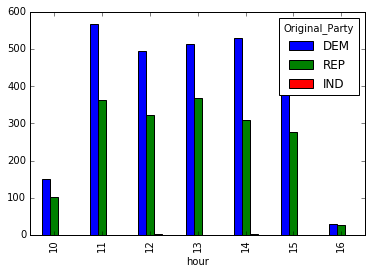

In [158]:
# Plot a bar chart with different color bars for # votes per original party by hour
timing2.plot(kind='bar')

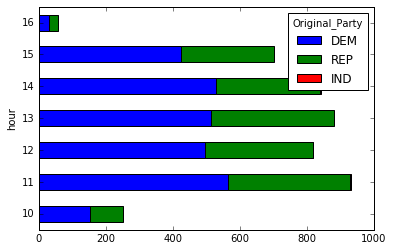

In [159]:
# Stack the values in a horizontal chart
timing2.plot(kind="barh", stacked="True")